In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
df = pd.read_csv("C:\\Users\\Public\\Documents\\Data Folders\\digital_ads.csv")

In [244]:
df.head()

,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion
0,3916,20-24,M,15,7350,1,1.43,2
1,3917,20-24,M,16,17861,2,1.82,2
2,3920,20-24,M,20,693,0,0.00,1
3,3928,20-24,M,28,4259,1,1.25,1
4,3928,20-24,M,28,4133,1,1.29,1


In [246]:
df

,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion
0,3916,20-24,M,15,7350,1,1.43,2
1,3917,20-24,M,16,17861,2,1.82,2
2,3920,20-24,M,20,693,0,0.00,1
3,3928,20-24,M,28,4259,1,1.25,1
4,3928,20-24,M,28,4133,1,1.29,1
...,...,...,...,...,...,...,...,...
995,4722,35-39,F,10,1358324,346,465.08,8
996,4723,35-39,F,15,662249,163,234.94,2
997,4723,35-39,F,15,559554,139,195.08,2
998,4724,35-39,F,16,320757,68,104.69,2


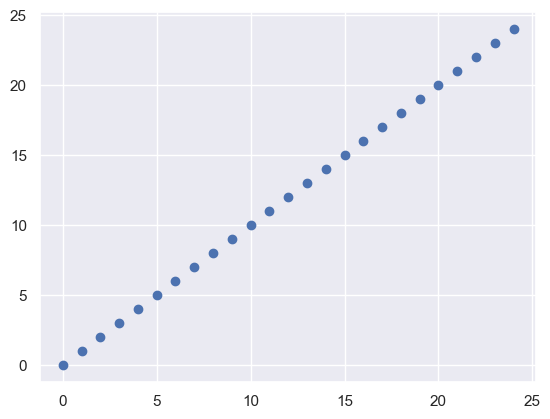

In [248]:
#Positive correlation
x = np.arange(start=0, stop=25, step=1)
plt.plot(x, 'o')

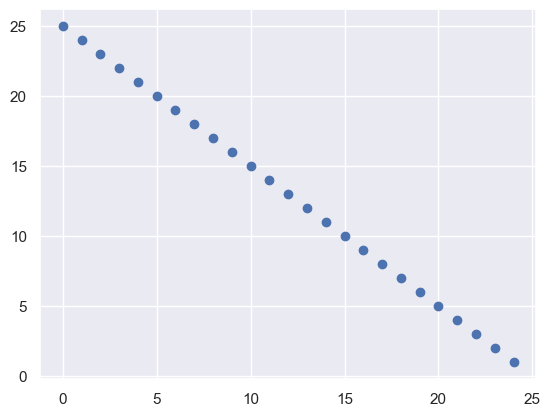

In [250]:
#Negative correlation
x = np.arange(start=25, stop=0, step=-1)
plt.plot(x, 'o')

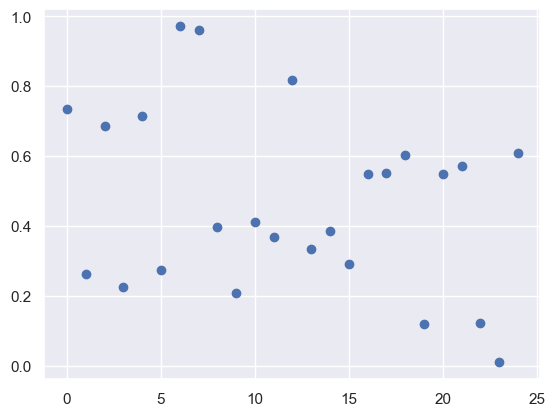

In [252]:
#No correlation
x = np.random.rand(25)
plt.plot(x, 'o')

<Axes: xlabel='Impressions', ylabel='Spent'>

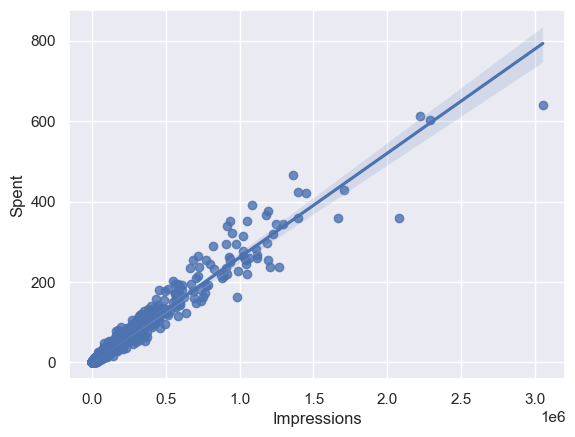

In [253]:
sns.regplot(x="Impressions", y="Spent", data=df)

<Axes: xlabel='Clicks', ylabel='Spent'>

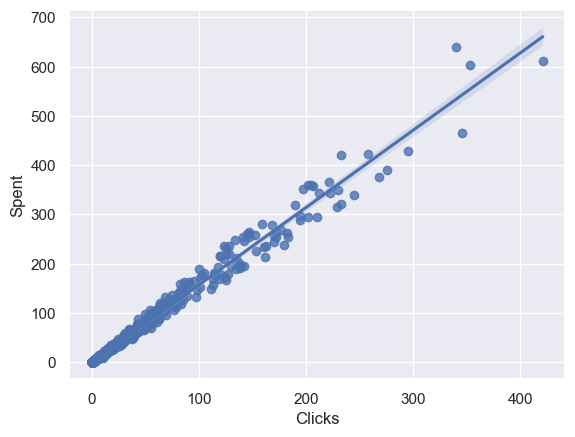

In [256]:
sns.regplot(x="Clicks", y="Spent", data=df)

In [258]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign_id       1000 non-null   int64  
 1   age               1000 non-null   object 
 2   gender            1000 non-null   object 
 3   interest          1000 non-null   int64  
 4   Impressions       1000 non-null   int64  
 5   Clicks            1000 non-null   int64  
 6   Spent             1000 non-null   float64
 7   Total_Conversion  1000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


###### Correlation using correlation Function

In [261]:
#Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()  


,campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion
campaign_id,1.000000,0.024571,-0.108402,-0.095766,-0.100197,-0.081750
interest,0.024571,1.000000,-0.068033,-0.059114,-0.062194,-0.067472
Impressions,-0.108402,-0.068033,1.000000,0.954466,0.976117,0.839176
Clicks,-0.095766,-0.059114,0.954466,1.000000,0.992614,0.726883
Spent,-0.100197,-0.062194,0.976117,0.992614,1.000000,0.760439
Total_Conversion,-0.081750,-0.067472,0.839176,0.726883,0.760439,1.000000


In [263]:
import seaborn as sns

In [265]:
#Select only numeric columns
df_select = df[['Total_Conversion', 'interest', 'Impressions', 'Spent', 'Clicks']]
df_select

,Total_Conversion,interest,Impressions,Spent,Clicks
0,2,15,7350,1.43,1
1,2,16,17861,1.82,2
2,1,20,693,0.00,0
3,1,28,4259,1.25,1
4,1,28,4133,1.29,1
...,...,...,...,...,...
995,8,10,1358324,465.08,346
996,2,15,662249,234.94,163
997,2,15,559554,195.08,139
998,2,16,320757,104.69,68


###### Correlation using Heatmap

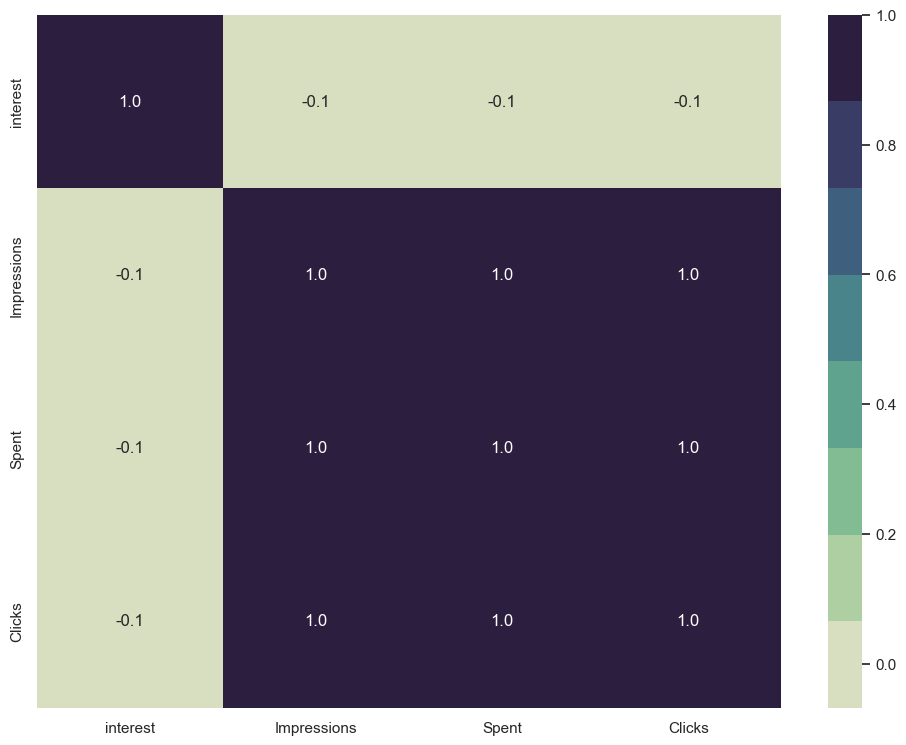

In [268]:
#correlation using visualization
plt.figure(figsize=(12, 9))
sns.set()
sns.heatmap(df_select[df_select.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

###### Let's compute the Pearson correlation coefficient as well as the p-value with the help of the scipy.stats library.

In [271]:
#Import the stat library for coeff & p values
from scipy import stats

###### Correlation using Stats algorithm for calculation, check to see if this correlation is statistically significant.

In [274]:
#Calculate pearson coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df['Impressions'], df['Spent'])

In [276]:
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9761171212282658  with a P-value of P = 0.0


##### Insights
- the Pearson correlation coefficient of ~ 0.97 and a p-value is 0.
- P-value is the probability that the true value of r is zero (no correlation).
- Since the coefficient is >0.7, we conclude that we are observing a high positive correlation between engine size and price.
- Finally, the p-value is below the significance level of 0.05. In conclusion, the correlation calculated above is not a coincidence and therefore significant.

###### Correlation Matrix

In [280]:
dfnum = df.select_dtypes(include=['number'])  # Select only numeric columns
df_corr = dfnum.corr()  # Calculate correlation on numeric columns
round(df_corr, 2)  # Round the results to 2 decimal places


,campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion
campaign_id,1.00,0.02,-0.11,-0.10,-0.10,-0.08
interest,0.02,1.00,-0.07,-0.06,-0.06,-0.07
Impressions,-0.11,-0.07,1.00,0.95,0.98,0.84
Clicks,-0.10,-0.06,0.95,1.00,0.99,0.73
Spent,-0.10,-0.06,0.98,0.99,1.00,0.76
Total_Conversion,-0.08,-0.07,0.84,0.73,0.76,1.00


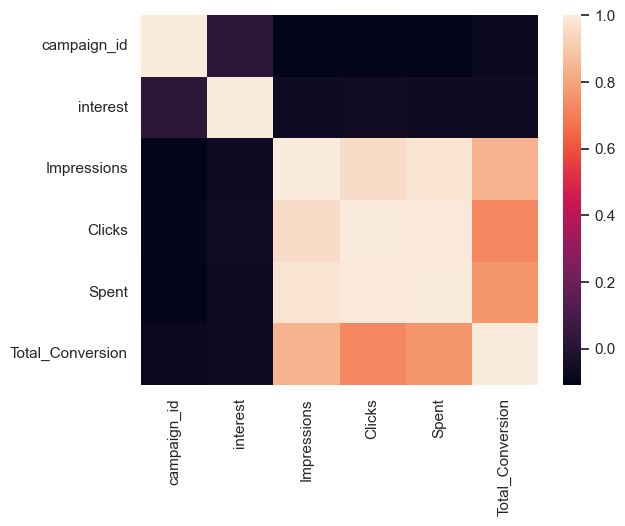

In [282]:
sns.heatmap(df_corr);

###### Correlation using Scatterplot

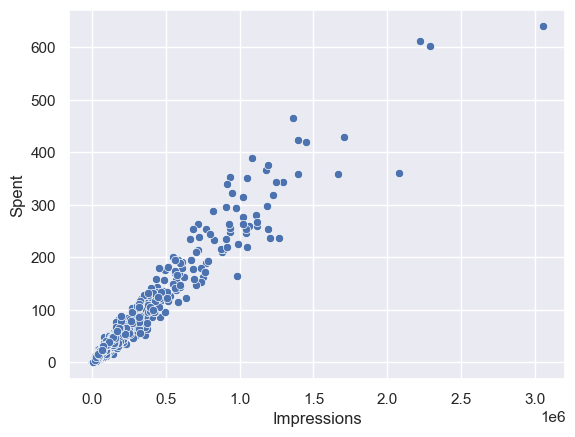

In [285]:
sns.scatterplot(x="Impressions", y="Spent", data=df);

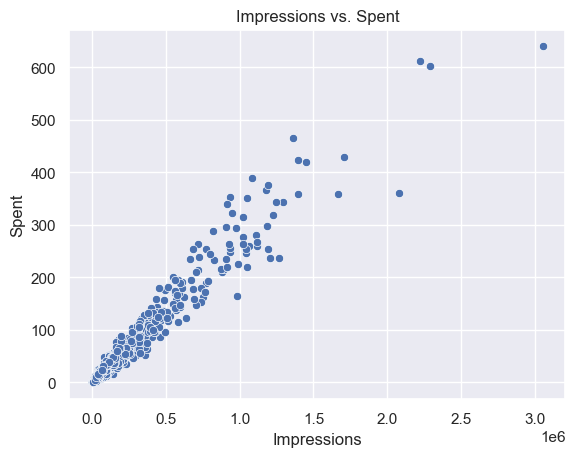

In [286]:
#Adding lables to the scatterplot
ax = sns.scatterplot(x="Impressions", y="Spent", data=df)
ax.set_title("Impressions vs. Spent")
ax.set_xlabel("Impressions");

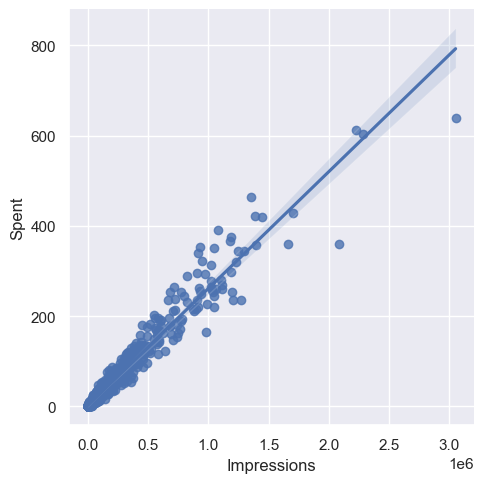

In [288]:
#Adding best fit line
sns.lmplot(x="Impressions", y="Spent", data=df);

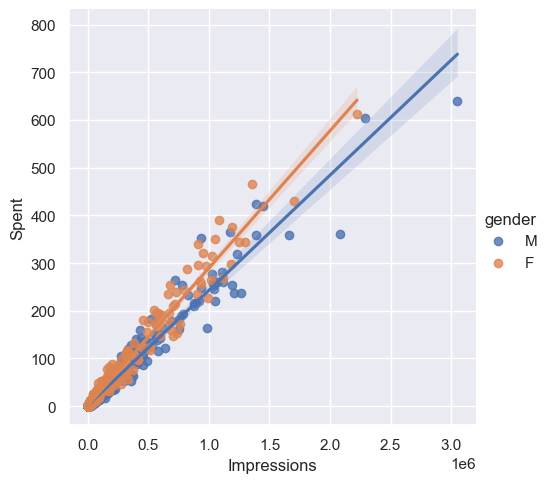

In [290]:
#Adding colors using a boolean field
sns.lmplot(x="Impressions", y="Spent", hue="gender", data=df);

- -1 indicates a perfectly negative linear correlation between two variables
- indicates no linear correlation between two variables
- indicates a perfectly positive linear correlation between two variables